In [3]:
!pip install yfinance
!pip install tensorflow

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0355 - val_loss: 0.0019
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0015 - val_

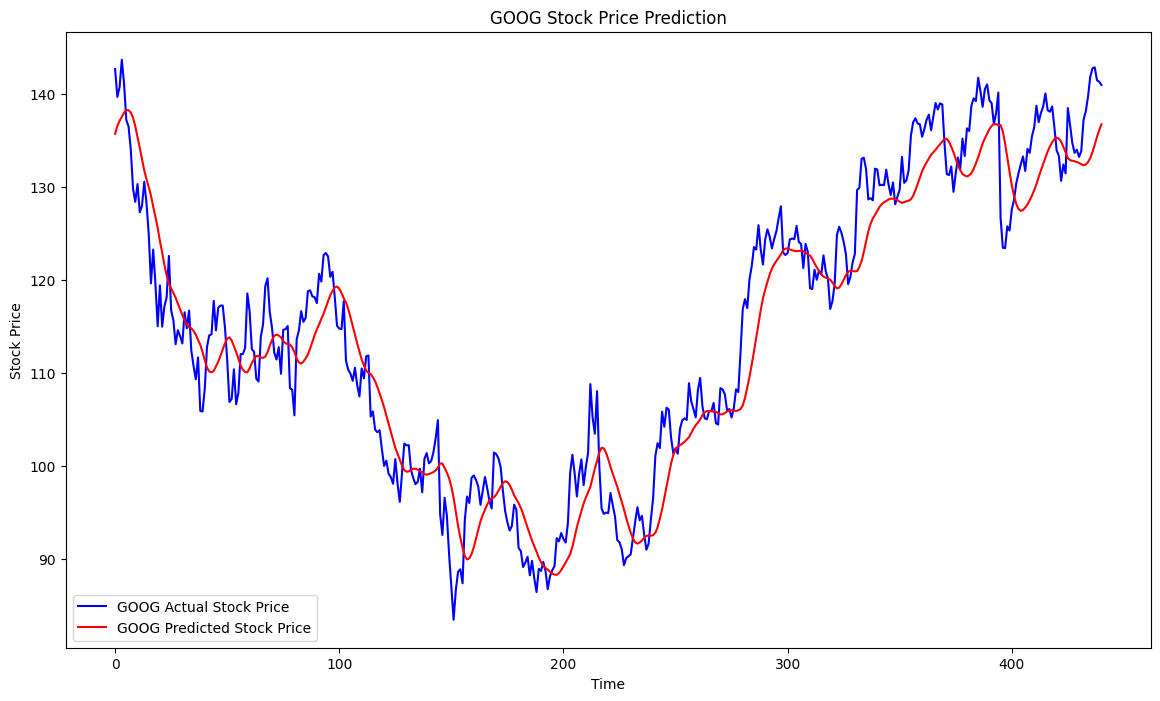

Mean Squared Error: 22.51895636417114


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 3: Load Historical Stock Data (Google Stock for example)
stock_symbol = 'GOOG'  # You can change this to any stock symbol
data = yf.download(stock_symbol, start='2015-01-01', end='2023-12-31')

# Show the first few rows of data
data.head()

# Step 4: Preprocessing the data
# We are using 'Close' price for prediction
data = data[['Close']]  # Selecting only the Close price

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of time steps (for example, 60 days)
time_step = 60

# Create the data with time steps (X_train, y_train)
X = []
y = []

for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i, 0])  # Previous 'time_step' prices
    y.append(scaled_data[i, 0])  # The next day's closing price

X = np.array(X)
y = np.array(y)

# Reshape X to be a 3D array for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing datasets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build the LSTM Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer for predicting next day's stock price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions
predictions = model.predict(X_test)

# Step 8: Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Visualize the results
plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, color='blue', label=f'{stock_symbol} Actual Stock Price')
plt.plot(predictions, color='red', label=f'{stock_symbol} Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 10: Evaluate the model (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')

[*********************100%***********************]  1 of 1 completed


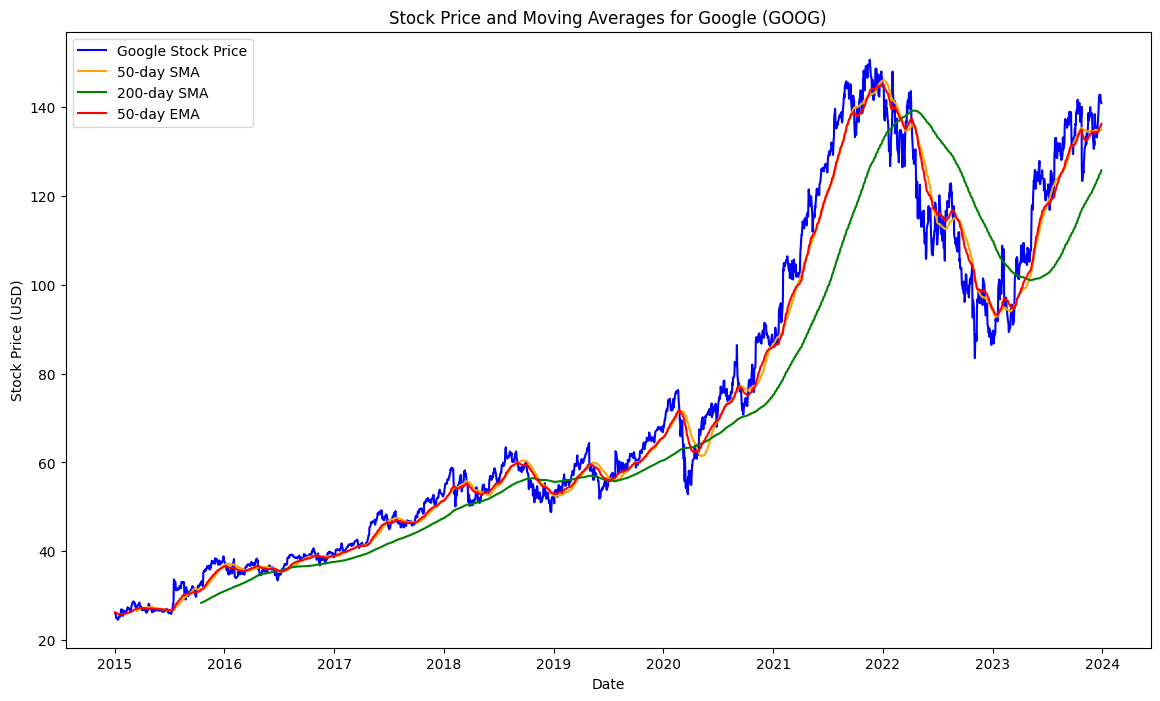

In [6]:
# Step 1: Moving Averages Visualization
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data (e.g., Google stock)
stock_symbol = 'GOOG'
data = yf.download(stock_symbol, start='2015-01-01', end='2023-12-31')

# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Simple Moving Average (50 days)
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # Simple Moving Average (200 days)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()  # Exponential Moving Average (50 days)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Google Stock Price', color='blue')
plt.plot(data['SMA_50'], label='50-day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-day SMA', color='green')
plt.plot(data['EMA_50'], label='50-day EMA', color='red')

plt.title('Stock Price and Moving Averages for Google (GOOG)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='upper left')
plt.show()


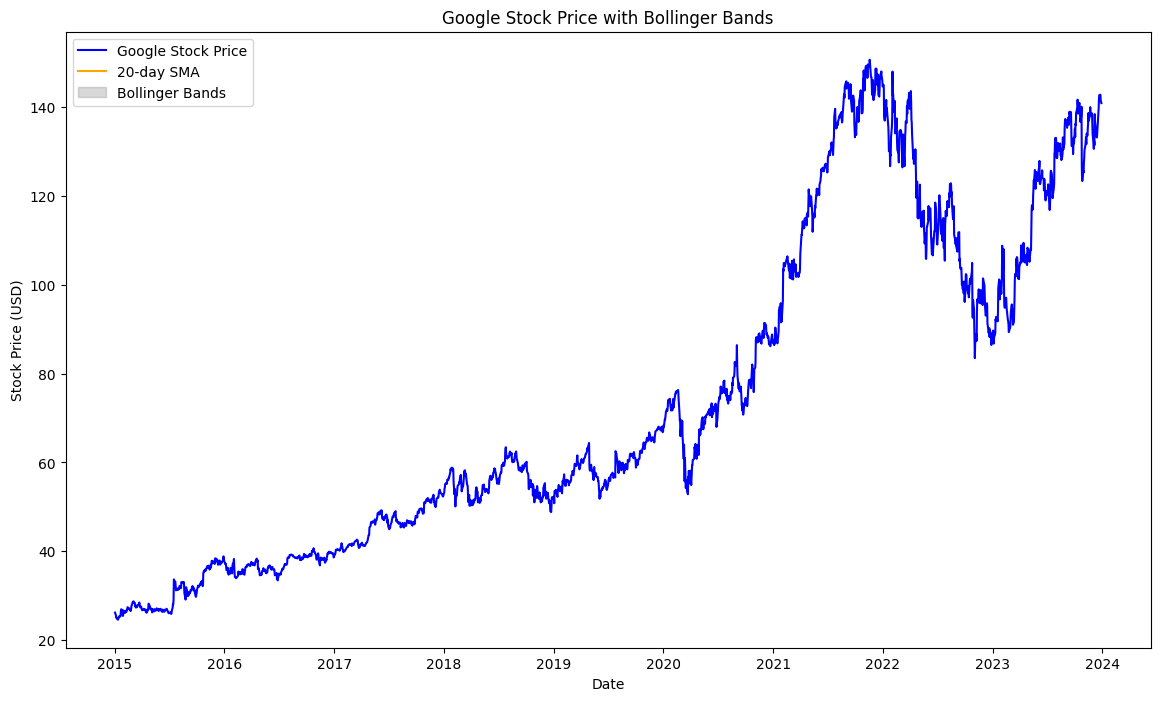

In [8]:
# Step 2: Bollinger Bands Visualization
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Bollinger Bands
data['20-day SMA'] = data['Close'].rolling(window=20).mean()
data['20-day STD'] = data['Close'].rolling(window=20).std()

# Upper and Lower Bollinger Bands
data['Upper Band'] = data['20-day SMA'] + (data['20-day STD'] * 2)
data['Lower Band'] = data['20-day SMA'] - (data['20-day STD'] * 2)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Google Stock Price', color='blue')
plt.plot(data['20-day SMA'], label='20-day SMA', color='orange')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.3, label='Bollinger Bands')

plt.title('Google Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='upper left')
plt.show()


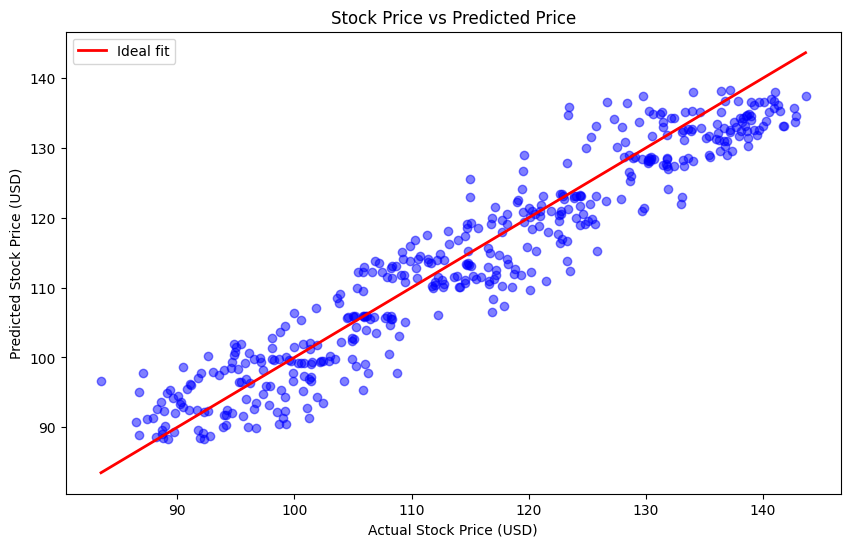

In [10]:
# Step 3: Stock Price vs Predicted Price (Scatter Plot)
import matplotlib.pyplot as plt

# Assuming predictions and actual values are available
# predictions = model.predict(X_test)  # Predicted prices
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Actual prices

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', lw=2, label="Ideal fit")
plt.title('Stock Price vs Predicted Price')
plt.xlabel('Actual Stock Price (USD)')
plt.ylabel('Predicted Stock Price (USD)')
plt.legend(loc='upper left')
plt.show()


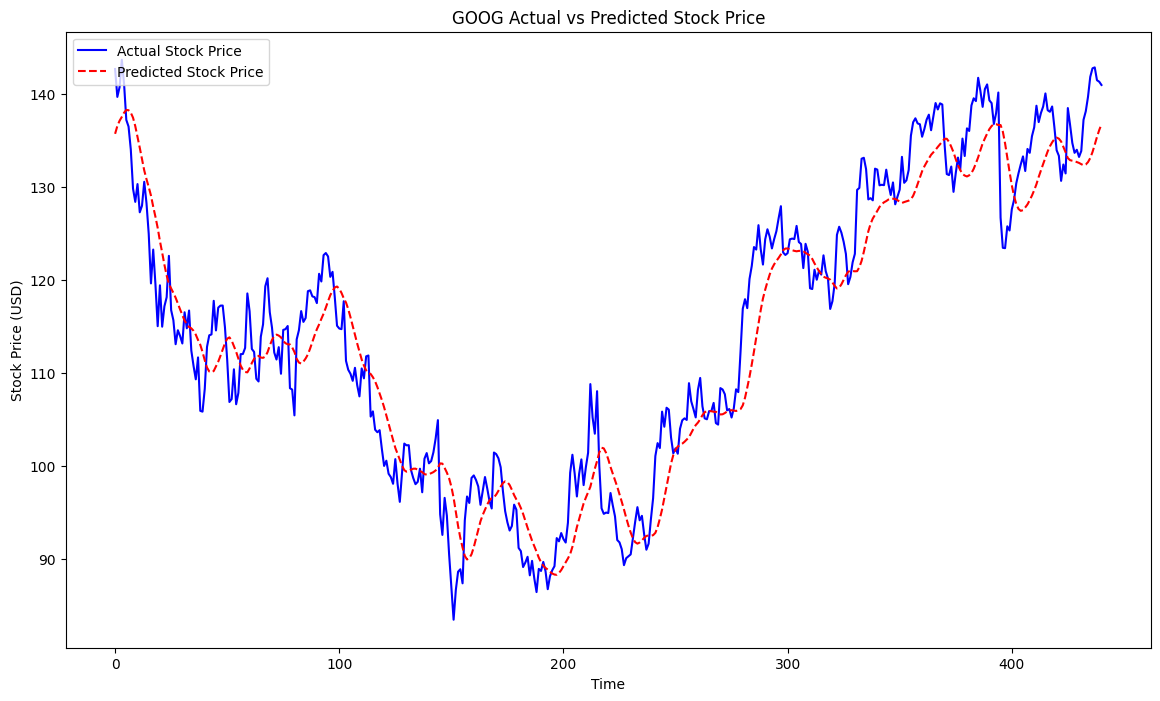

In [12]:
# Step 5: Line Plot of Predicted vs Actual Stock Price
plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(predictions, label='Predicted Stock Price', color='red', linestyle='--')

plt.title(f'{stock_symbol} Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='upper left')
plt.show()
